In [2]:
import time
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
pd.option_context('display.float_format', lambda x: '%.3f' % x)

In [3]:
train = pd.read_csv("E:/DataMinig/GongYingLian/goodsaleSort.csv")
print(train.head())

   data_date goods_id    sku_id  goods_num  goods_price  orginal_shop_price
0   20171226   G3pVuZ  SK013PAq          1         6.99                6.99
1   20180218   G3pVuZ  SK013PAq          1         2.99                6.99
2   20180311   G3pVuZ  SK013PAq          1         1.99                6.99
3   20180314   G3pVuZ  SK013PAq          1         1.99                6.99
4   20170516   GhbasQ  SK013i5Y          1         9.99               11.99


In [24]:
print(train.describe())

          data_date     goods_num   goods_price  orginal_shop_price  \
count  3.971517e+06  3.971517e+06  3.971517e+06        3.971517e+06   
mean   2.017319e+07  2.919166e+00  1.068411e+01        1.732017e+01   
std    4.036752e+03  6.886803e+00  8.824719e+00        1.285500e+01   
min    2.017030e+07  1.000000e+00  0.000000e+00        0.000000e+00   
25%    2.017073e+07  1.000000e+00  5.000000e+00        8.990000e+00   
50%    2.017110e+07  1.000000e+00  8.990000e+00        1.499000e+01   
75%    2.017123e+07  3.000000e+00  1.399000e+01        2.299000e+01   
max    2.018032e+07  2.157000e+03  1.332000e+03        1.332000e+03   

               year         month           day          week         index  
count  3.971517e+06  3.971517e+06  3.971517e+06  3.971517e+06  3.971517e+06  
mean   2.017248e+03  6.933038e+00  1.583044e+01  2.826000e+01  4.115372e+01  
std    4.318263e-01  3.778243e+00  8.550883e+00  1.654196e+01  1.462260e+01  
min    2.017000e+03  1.000000e+00  1.000000e+00 

In [6]:
train.shape

(3971517, 6)

In [7]:
for col in train.columns:
    print(col)

data_date
goods_id
sku_id
goods_num
goods_price
orginal_shop_price


In [8]:
def trans_date(x):
    str_x = str(x)
    year = int(str_x[:4])
    month = int(str_x[4:6])
    day = int(str_x[6:])
    return datetime.date(year, month, day)


In [9]:
def get_week(x):
    week = int(x.strftime("%W"))
    return week

In [10]:
train['data_date_'] = train['data_date'].apply(trans_date)


In [11]:
train['year'] = train['data_date_'].apply(lambda x: x.year)
train['month'] = train['data_date_'].apply(lambda x: x.month)
train['day'] = train['data_date_'].apply(lambda x: x.day)
train['week'] = train['data_date_'].apply(get_week)
train['index'] = (train['year']-2017) * 52 + train['week']


In [25]:
print(train.head())


   data_date goods_id    sku_id  goods_num  goods_price  orginal_shop_price  \
0   20171226   G3pVuZ  SK013PAq          1         6.99                6.99   
1   20180218   G3pVuZ  SK013PAq          1         2.99                6.99   
2   20180311   G3pVuZ  SK013PAq          1         1.99                6.99   
3   20180314   G3pVuZ  SK013PAq          1         1.99                6.99   
4   20170516   GhbasQ  SK013i5Y          1         9.99               11.99   

   data_date_  year  month  day  week  index  
0  2017-12-26  2017     12   26    52     52  
1  2018-02-18  2018      2   18     7     59  
2  2018-03-11  2018      3   11    10     62  
3  2018-03-14  2018      3   14    11     63  
4  2017-05-16  2017      5   16    20     20  


In [14]:
train_class = train[(train['index'] > 0) & (train['index'] < 63)].groupby(['sku_id', 'index'])['goods_num'].sum().\
    to_frame().reset_index()


In [16]:
print(train_class[train_class['index'] == 62])

           sku_id  index  goods_num
2        SK013PAq     62          1
15       SK013i5Y     62          1
38       SK014m67     62          3
49       SK019vAh     62          1
81       SK01GLtA     62          2
90       SK01JRhK     62          1
115      SK01K9xd     62          1
118      SK01LD7g     62          2
160      SK01LkA7     62          4
185      SK01QKFc     62          9
228      SK01QxDV     62          2
289      SK01RvqA     62          2
301      SK01RzVS     62          1
331      SK01YK8n     62          2
345      SK01aOV9     62          1
373      SK01hQVy     62          1
380      SK01kiNH     62          1
384      SK01lsLD     62          1
395      SK01m3Pi     62          1
410      SK01mAJ2     62          1
429      SK01p2ut     62          3
467      SK01qzyP     62          2
472      SK01r4Ih     62          1
489      SK01rBpU     62          1
491      SK01yrfT     62          1
510      SK02BVlK     62          3
520      SK02BcP5     62    

In [17]:
def plt_class(data,x_col,y_col,class_name):
    data_name = data[data.sku_id == class_name]
    plt.scatter(x = data_name[x_col], y = data_name[y_col])

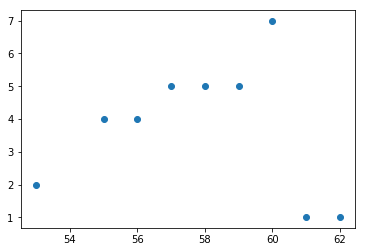

In [18]:
plt_class(train_class[train_class['index'] > 52], 'index', 'goods_num', 'SKEhL1pZ')

In [19]:
print(train_class[train_class['index'] == 0])

Empty DataFrame
Columns: [sku_id, index, goods_num]
Index: []


In [20]:
def plt_sales(data,x_col,y_col):
    plt.scatter(x=data[x_col], y=data[y_col], norm=1)


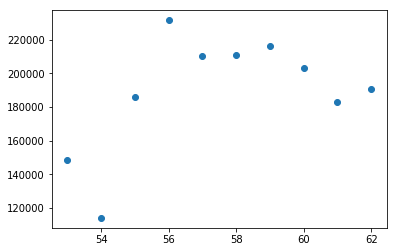

In [27]:
plt_sales(train_class[train_class['index']>52].groupby('index')['goods_num'].sum().to_frame().reset_index()
          , 'index', 'goods_num')

E:\DataMinig\DataMining\venv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


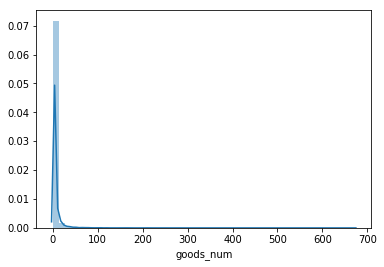

In [22]:
sns.distplot(train_class[train_class['index'] == 61]['goods_num'])

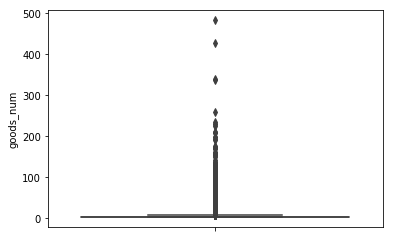

In [23]:
sns.boxplot(train_class[train_class['index'] == 62]['goods_num'],orient='ver')